In [1]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
from LinearGAN import Discriminator, Generator

In [2]:
x = torch.randn(1, 784)
model = Discriminator(784)

out = model(x)
out.shape

torch.Size([1, 1])

In [3]:
x = torch.randn(1, 64)
model = Generator(64, 784)

out = model(x)
out.shape

torch.Size([1, 784])

In [4]:
device = 'cpu'
lr = 3e-4
z_dim = 64
image_dim = 28 * 28 * 1 
batch_size = 32
num_epochs = 500

In [5]:
disc = Discriminator(image_dim).to(device)
gen = Generator(z_dim, image_dim).to(device)
fixed_noise = torch.randn((batch_size, 64)).to(device)

In [6]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(), 
    torchvision.transforms.Normalize((0.5), (0.5)), 
])

In [7]:
dataset = torchvision.datasets.MNIST(root="Datasets/", transform=transforms, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting Datasets/MNIST/raw/train-images-idx3-ubyte.gz to Datasets/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting Datasets/MNIST/raw/train-labels-idx1-ubyte.gz to Datasets/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting Datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to Datasets/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting Datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to Datasets/MNIST/raw



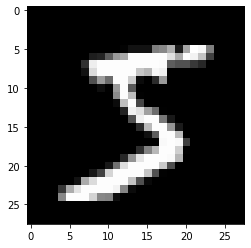

In [8]:
import matplotlib.pyplot as plt

plt.imshow(dataset[0][0].permute(1, 2, 0), cmap='gray')

In [9]:
loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

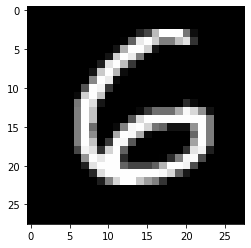

In [10]:
plt.imshow(next(iter(loader))[0][0].permute(1, 2, 0), cmap='gray')

In [11]:
opt_disc = torch.optim.Adam(disc.parameters(), lr=lr)
opt_gen = torch.optim.Adam(gen.parameters(), lr=lr)
criterion = nn.BCELoss()
writer_fake = SummaryWriter(f"Runs/LinearGAN/Fake")
writer_real = SummaryWriter(f"Runs/LinearGAN/Real")

In [ ]:
gen.train()
disc.train()

In [15]:
import tqdm

step = 0
 
for epoch in range(num_epochs):
    for batch_idx, (real, _) in enumerate(tqdm.tqdm(loader)):
        
        real = real.view(-1, 784).to(device)
        noise = torch.randn((batch_size, z_dim)).to(device)
        fake = gen(noise).to(device)
        
        disc_real = disc(real).view(-1)
        lossD_real = criterion(disc_real, torch.ones_like(disc_real))
    
        disc_fake = disc(fake).view(-1)
        lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
        
        lossD = (lossD_fake + lossD_real) / 2.0
        
        disc.zero_grad()
        lossD.backward(retain_graph=True)
        opt_disc.step()
        
        
        output = disc(fake).view(-1).to(device)
        lossG = criterion(output, torch.ones_like(output))
        gen.zero_grad()
        lossG.backward()
        opt_gen.step()
        
        if batch_idx == 0:
            print(
                 f"Epoch [{epoch+1}/{num_epochs}] \nDiscriminator Loss: {lossD:.4f}, Generator Loss: {lossG:.4f}"
            )
                
            with torch.no_grad():
                fake = gen(fixed_noise).reshape(-1, 1, 28, 28)
                data = real.reshape(-1, 1, 28, 28)
                img_fake_grid = torchvision.utils.make_grid(fake, normalize=True)
                img_real_grid = torchvision.utils.make_grid(data, normalize=True)
             
                writer_real.add_image('LinearGAN MNIST Discriminator', img_real_grid, global_step=step)

                writer_fake.add_image('LinearGAN MNIST Generator', img_fake_grid, global_step=step)
    
                step+=1 
                  

  0%|▏                                      | 7/1875 [00:00<00:28, 65.30it/s]

Epoch [337/500] 
Discriminator Loss: 0.4807, Generator Loss: 1.3186


  1%|▏                                     | 12/1875 [00:00<00:30, 61.12it/s]

Epoch [338/500] 
Discriminator Loss: 0.5340, Generator Loss: 1.2875


  0%|                                       | 4/1875 [00:00<00:50, 37.15it/s]

Epoch [339/500] 
Discriminator Loss: 0.6116, Generator Loss: 1.1289


  1%|▎                                     | 18/1875 [00:00<00:21, 88.24it/s]

Epoch [340/500] 
Discriminator Loss: 0.6016, Generator Loss: 1.3589


  1%|▏                                     | 12/1875 [00:00<00:30, 60.65it/s]

Epoch [341/500] 
Discriminator Loss: 0.5199, Generator Loss: 1.2424


  1%|▎                                    | 15/1875 [00:00<00:12, 145.44it/s]

Epoch [342/500] 
Discriminator Loss: 0.5314, Generator Loss: 1.2690


  2%|▋                                    | 35/1875 [00:00<00:10, 175.17it/s]

Epoch [343/500] 
Discriminator Loss: 0.5915, Generator Loss: 1.0341


  2%|▊                                    | 40/1875 [00:00<00:09, 198.32it/s]

Epoch [344/500] 
Discriminator Loss: 0.5973, Generator Loss: 1.1339


  0%|▏                                      | 7/1875 [00:00<00:58, 32.07it/s]

Epoch [345/500] 
Discriminator Loss: 0.4409, Generator Loss: 1.3687


  1%|▏                                     | 12/1875 [00:00<00:32, 58.20it/s]

Epoch [346/500] 
Discriminator Loss: 0.5120, Generator Loss: 1.2327


  1%|▎                                     | 16/1875 [00:00<00:23, 79.71it/s]

Epoch [347/500] 
Discriminator Loss: 0.5597, Generator Loss: 1.2282


  0%|                                       | 1/1875 [00:00<03:46,  8.26it/s]

Epoch [348/500] 
Discriminator Loss: 0.5111, Generator Loss: 1.3811


  1%|▏                                     | 10/1875 [00:00<00:36, 50.86it/s]

Epoch [349/500] 
Discriminator Loss: 0.5305, Generator Loss: 1.2188


  1%|▎                                     | 15/1875 [00:00<00:24, 75.83it/s]

Epoch [350/500] 
Discriminator Loss: 0.5267, Generator Loss: 0.9946


  1%|▎                                     | 15/1875 [00:00<00:25, 72.09it/s]

Epoch [351/500] 
Discriminator Loss: 0.5339, Generator Loss: 1.2959


  1%|▎                                     | 18/1875 [00:00<00:21, 87.80it/s]

Epoch [352/500] 
Discriminator Loss: 0.4684, Generator Loss: 1.4905


  1%|▍                                     | 19/1875 [00:00<00:20, 92.69it/s]

Epoch [353/500] 
Discriminator Loss: 0.4818, Generator Loss: 1.2617


  1%|▍                                    | 21/1875 [00:00<00:17, 104.30it/s]

Epoch [354/500] 
Discriminator Loss: 0.5990, Generator Loss: 1.3266


  1%|▎                                     | 15/1875 [00:00<00:25, 73.78it/s]

Epoch [355/500] 
Discriminator Loss: 0.6396, Generator Loss: 1.2603


  1%|▍                                    | 20/1875 [00:00<00:18, 100.77it/s]

Epoch [356/500] 
Discriminator Loss: 0.5454, Generator Loss: 1.2592


  1%|▎                                     | 18/1875 [00:00<00:20, 90.14it/s]

Epoch [357/500] 
Discriminator Loss: 0.5387, Generator Loss: 1.3936


  1%|▎                                     | 14/1875 [00:00<00:27, 67.70it/s]

Epoch [358/500] 
Discriminator Loss: 0.4780, Generator Loss: 1.0759


  1%|▎                                     | 16/1875 [00:00<00:22, 81.96it/s]

Epoch [359/500] 
Discriminator Loss: 0.4784, Generator Loss: 1.4516


  0%|                                       | 2/1875 [00:00<02:01, 15.36it/s]

Epoch [360/500] 
Discriminator Loss: 0.5064, Generator Loss: 1.2881


  1%|▎                                     | 18/1875 [00:00<00:20, 89.76it/s]

Epoch [361/500] 
Discriminator Loss: 0.4793, Generator Loss: 1.6933


  1%|▎                                     | 15/1875 [00:00<00:23, 78.19it/s]

Epoch [362/500] 
Discriminator Loss: 0.4917, Generator Loss: 1.2239


  1%|▍                                    | 21/1875 [00:00<00:17, 103.75it/s]

Epoch [363/500] 
Discriminator Loss: 0.5412, Generator Loss: 1.4113


  0%|▏                                      | 7/1875 [00:00<00:28, 65.86it/s]

Epoch [364/500] 
Discriminator Loss: 0.5487, Generator Loss: 1.2857


  1%|▎                                     | 17/1875 [00:00<00:21, 86.19it/s]

Epoch [365/500] 
Discriminator Loss: 0.5041, Generator Loss: 1.2521


  0%|▏                                      | 8/1875 [00:00<00:45, 41.07it/s]

Epoch [366/500] 
Discriminator Loss: 0.5153, Generator Loss: 1.3203


  1%|▎                                     | 17/1875 [00:00<00:21, 87.09it/s]

Epoch [367/500] 
Discriminator Loss: 0.5414, Generator Loss: 1.0554


  1%|▎                                     | 17/1875 [00:00<00:22, 83.55it/s]

Epoch [368/500] 
Discriminator Loss: 0.4340, Generator Loss: 1.5043


  1%|▎                                     | 17/1875 [00:00<00:22, 83.26it/s]

Epoch [369/500] 
Discriminator Loss: 0.6117, Generator Loss: 1.1198


  1%|▎                                     | 17/1875 [00:00<00:22, 83.55it/s]

Epoch [370/500] 
Discriminator Loss: 0.5455, Generator Loss: 1.0984


  1%|▎                                     | 18/1875 [00:00<00:20, 90.46it/s]

Epoch [371/500] 
Discriminator Loss: 0.5275, Generator Loss: 1.3678


  0%|▏                                      | 7/1875 [00:00<00:27, 67.71it/s]

Epoch [372/500] 
Discriminator Loss: 0.5466, Generator Loss: 1.1899


  1%|▎                                     | 18/1875 [00:00<00:21, 88.35it/s]

Epoch [373/500] 
Discriminator Loss: 0.5704, Generator Loss: 1.2355


  1%|▎                                     | 18/1875 [00:00<00:21, 87.48it/s]

Epoch [374/500] 
Discriminator Loss: 0.5021, Generator Loss: 1.1246


  1%|▍                                    | 21/1875 [00:00<00:17, 104.65it/s]

Epoch [375/500] 
Discriminator Loss: 0.5794, Generator Loss: 1.5689


  1%|▍                                    | 22/1875 [00:00<00:16, 109.47it/s]

Epoch [376/500] 
Discriminator Loss: 0.4829, Generator Loss: 1.2741


  1%|▎                                     | 18/1875 [00:00<00:20, 92.79it/s]

Epoch [377/500] 
Discriminator Loss: 0.6503, Generator Loss: 1.2136


  1%|▍                                    | 21/1875 [00:00<00:17, 105.33it/s]

Epoch [378/500] 
Discriminator Loss: 0.4610, Generator Loss: 1.1945


  1%|▎                                     | 17/1875 [00:00<00:21, 84.62it/s]

Epoch [379/500] 
Discriminator Loss: 0.6238, Generator Loss: 1.3889


  1%|▎                                     | 18/1875 [00:00<00:21, 87.57it/s]

Epoch [380/500] 
Discriminator Loss: 0.5739, Generator Loss: 1.3502


  1%|▎                                     | 14/1875 [00:00<00:26, 70.14it/s]

Epoch [381/500] 
Discriminator Loss: 0.5563, Generator Loss: 1.4203


  1%|▍                                     | 19/1875 [00:00<00:19, 95.78it/s]

Epoch [382/500] 
Discriminator Loss: 0.6045, Generator Loss: 1.1136


  1%|▎                                     | 17/1875 [00:00<00:22, 82.48it/s]

Epoch [383/500] 
Discriminator Loss: 0.5499, Generator Loss: 1.0173


  1%|▎                                     | 18/1875 [00:00<00:20, 90.13it/s]

Epoch [384/500] 
Discriminator Loss: 0.5024, Generator Loss: 1.2505


  1%|▍                                    | 20/1875 [00:00<00:18, 100.00it/s]

Epoch [385/500] 
Discriminator Loss: 0.5471, Generator Loss: 1.1924


  1%|▎                                     | 18/1875 [00:00<00:20, 89.37it/s]

Epoch [386/500] 
Discriminator Loss: 0.4981, Generator Loss: 1.3211


  1%|▍                                     | 19/1875 [00:00<00:19, 94.66it/s]

Epoch [387/500] 
Discriminator Loss: 0.5098, Generator Loss: 1.2681


  1%|▍                                     | 19/1875 [00:00<00:20, 91.48it/s]

Epoch [388/500] 
Discriminator Loss: 0.5652, Generator Loss: 1.4360


  1%|▎                                     | 18/1875 [00:00<00:20, 90.38it/s]

Epoch [389/500] 
Discriminator Loss: 0.4531, Generator Loss: 1.3347


  1%|▍                                    | 21/1875 [00:00<00:17, 105.99it/s]

Epoch [390/500] 
Discriminator Loss: 0.4843, Generator Loss: 1.2862


  1%|▍                                    | 22/1875 [00:00<00:16, 109.11it/s]

Epoch [391/500] 
Discriminator Loss: 0.4947, Generator Loss: 1.4585


  1%|▍                                    | 20/1875 [00:00<00:18, 100.44it/s]

Epoch [392/500] 
Discriminator Loss: 0.5483, Generator Loss: 1.1050


  0%|▏                                      | 8/1875 [00:00<00:25, 73.11it/s]

Epoch [393/500] 
Discriminator Loss: 0.6076, Generator Loss: 1.5039


  0%|                                       | 5/1875 [00:00<00:39, 46.83it/s]

Epoch [394/500] 
Discriminator Loss: 0.4766, Generator Loss: 1.1426


  1%|▎                                     | 18/1875 [00:00<00:20, 90.91it/s]

Epoch [395/500] 
Discriminator Loss: 0.4533, Generator Loss: 1.2838


  1%|▍                                     | 19/1875 [00:00<00:19, 93.40it/s]

Epoch [396/500] 
Discriminator Loss: 0.5216, Generator Loss: 1.2009


  1%|▏                                     | 12/1875 [00:00<00:30, 61.49it/s]

Epoch [397/500] 
Discriminator Loss: 0.5275, Generator Loss: 1.4829


  1%|▎                                     | 17/1875 [00:00<00:22, 83.89it/s]

Epoch [398/500] 
Discriminator Loss: 0.4740, Generator Loss: 1.3866


  1%|▎                                     | 18/1875 [00:00<00:21, 88.10it/s]

Epoch [399/500] 
Discriminator Loss: 0.5093, Generator Loss: 1.0492


  1%|▎                                     | 17/1875 [00:00<00:21, 85.76it/s]

Epoch [400/500] 
Discriminator Loss: 0.4644, Generator Loss: 1.3731


  1%|▍                                    | 21/1875 [00:00<00:17, 105.51it/s]

Epoch [401/500] 
Discriminator Loss: 0.5382, Generator Loss: 0.9679


  1%|▍                                     | 19/1875 [00:00<00:20, 92.54it/s]

Epoch [402/500] 
Discriminator Loss: 0.4639, Generator Loss: 1.1875


  1%|▎                                     | 17/1875 [00:00<00:21, 86.99it/s]

Epoch [403/500] 
Discriminator Loss: 0.4609, Generator Loss: 1.2010


  1%|▍                                     | 19/1875 [00:00<00:19, 95.43it/s]

Epoch [404/500] 
Discriminator Loss: 0.5439, Generator Loss: 1.1244


  1%|▍                                     | 19/1875 [00:00<00:19, 93.02it/s]

Epoch [405/500] 
Discriminator Loss: 0.4707, Generator Loss: 1.3275


  0%|                                       | 5/1875 [00:00<00:41, 44.80it/s]

Epoch [406/500] 
Discriminator Loss: 0.5870, Generator Loss: 1.2900


  1%|▍                                    | 21/1875 [00:00<00:18, 102.23it/s]

Epoch [407/500] 
Discriminator Loss: 0.6210, Generator Loss: 1.1861


  1%|▎                                     | 18/1875 [00:00<00:20, 92.26it/s]

Epoch [408/500] 
Discriminator Loss: 0.5456, Generator Loss: 1.6086


  1%|▎                                     | 18/1875 [00:00<00:21, 87.13it/s]

Epoch [409/500] 
Discriminator Loss: 0.5332, Generator Loss: 1.5165


  1%|▍                                     | 19/1875 [00:00<00:19, 97.27it/s]

Epoch [410/500] 
Discriminator Loss: 0.5224, Generator Loss: 0.9575


  0%|                                       | 3/1875 [00:00<01:08, 27.19it/s]

Epoch [411/500] 
Discriminator Loss: 0.4343, Generator Loss: 1.3440


  1%|▎                                     | 18/1875 [00:00<00:20, 89.81it/s]

Epoch [412/500] 
Discriminator Loss: 0.5557, Generator Loss: 1.3842


  1%|▎                                     | 18/1875 [00:00<00:20, 90.07it/s]

Epoch [413/500] 
Discriminator Loss: 0.6124, Generator Loss: 1.3381


  1%|▍                                     | 19/1875 [00:00<00:19, 93.53it/s]

Epoch [414/500] 
Discriminator Loss: 0.5600, Generator Loss: 1.0811


  1%|▎                                     | 18/1875 [00:00<00:20, 89.57it/s]

Epoch [415/500] 
Discriminator Loss: 0.4693, Generator Loss: 1.1205


  1%|▍                                    | 20/1875 [00:00<00:18, 101.61it/s]

Epoch [416/500] 
Discriminator Loss: 0.5334, Generator Loss: 1.1241


  1%|▎                                     | 18/1875 [00:00<00:20, 89.85it/s]

Epoch [417/500] 
Discriminator Loss: 0.5525, Generator Loss: 1.2299


  1%|▍                                    | 21/1875 [00:00<00:17, 104.26it/s]

Epoch [418/500] 
Discriminator Loss: 0.5942, Generator Loss: 1.1773


  1%|▎                                     | 18/1875 [00:00<00:21, 87.90it/s]

Epoch [419/500] 
Discriminator Loss: 0.4133, Generator Loss: 1.2718


  1%|▍                                     | 19/1875 [00:00<00:19, 95.86it/s]

Epoch [420/500] 
Discriminator Loss: 0.5195, Generator Loss: 1.2630


  1%|▎                                     | 18/1875 [00:00<00:20, 89.17it/s]

Epoch [421/500] 
Discriminator Loss: 0.5802, Generator Loss: 1.2143


  0%|▏                                      | 8/1875 [00:00<00:25, 74.59it/s]

Epoch [422/500] 
Discriminator Loss: 0.5251, Generator Loss: 1.2463


  1%|▍                                    | 21/1875 [00:00<00:17, 103.36it/s]

Epoch [423/500] 
Discriminator Loss: 0.5372, Generator Loss: 1.3540


  1%|▍                                     | 19/1875 [00:00<00:19, 93.60it/s]

Epoch [424/500] 
Discriminator Loss: 0.5158, Generator Loss: 1.3260


  1%|▎                                     | 18/1875 [00:00<00:20, 89.35it/s]

Epoch [425/500] 
Discriminator Loss: 0.5822, Generator Loss: 1.2476


  1%|▎                                     | 18/1875 [00:00<00:20, 89.38it/s]

Epoch [426/500] 
Discriminator Loss: 0.4910, Generator Loss: 1.2319


  1%|▍                                     | 20/1875 [00:00<00:18, 99.82it/s]

Epoch [427/500] 
Discriminator Loss: 0.5544, Generator Loss: 1.2703


  1%|▍                                     | 19/1875 [00:00<00:19, 94.46it/s]

Epoch [428/500] 
Discriminator Loss: 0.5996, Generator Loss: 0.9925


  1%|▎                                     | 17/1875 [00:00<00:22, 84.37it/s]

Epoch [429/500] 
Discriminator Loss: 0.5392, Generator Loss: 1.0697


  1%|▍                                     | 19/1875 [00:00<00:19, 94.62it/s]

Epoch [430/500] 
Discriminator Loss: 0.5428, Generator Loss: 1.4030


  1%|▎                                     | 18/1875 [00:00<00:20, 91.46it/s]

Epoch [431/500] 
Discriminator Loss: 0.5694, Generator Loss: 0.9621


  1%|▎                                     | 18/1875 [00:00<00:21, 87.57it/s]

Epoch [432/500] 
Discriminator Loss: 0.5035, Generator Loss: 1.1339


  1%|▍                                    | 21/1875 [00:00<00:17, 105.57it/s]

Epoch [433/500] 
Discriminator Loss: 0.5946, Generator Loss: 1.1696


  1%|▎                                     | 18/1875 [00:00<00:21, 86.83it/s]

Epoch [434/500] 
Discriminator Loss: 0.5202, Generator Loss: 1.4109


  1%|▍                                     | 19/1875 [00:00<00:19, 94.02it/s]

Epoch [435/500] 
Discriminator Loss: 0.6694, Generator Loss: 1.1267


  1%|▎                                     | 18/1875 [00:00<00:20, 88.98it/s]

Epoch [436/500] 
Discriminator Loss: 0.5035, Generator Loss: 1.1542


  1%|▍                                     | 19/1875 [00:00<00:19, 93.11it/s]

Epoch [437/500] 
Discriminator Loss: 0.4886, Generator Loss: 1.4997


  1%|▍                                     | 20/1875 [00:00<00:19, 96.58it/s]

Epoch [438/500] 
Discriminator Loss: 0.5812, Generator Loss: 1.4931


  0%|▏                                      | 7/1875 [00:00<00:28, 65.81it/s]

Epoch [439/500] 
Discriminator Loss: 0.4934, Generator Loss: 1.3121


  1%|▎                                     | 17/1875 [00:00<00:21, 84.59it/s]

Epoch [440/500] 
Discriminator Loss: 0.5508, Generator Loss: 1.1722


  1%|▎                                     | 18/1875 [00:00<00:20, 89.22it/s]

Epoch [441/500] 
Discriminator Loss: 0.5166, Generator Loss: 1.1055


  1%|▍                                     | 19/1875 [00:00<00:18, 98.31it/s]

Epoch [442/500] 
Discriminator Loss: 0.4823, Generator Loss: 1.6136


  1%|▎                                     | 17/1875 [00:00<00:21, 84.78it/s]

Epoch [443/500] 
Discriminator Loss: 0.5462, Generator Loss: 1.4407


  1%|▎                                     | 18/1875 [00:00<00:21, 87.80it/s]

Epoch [444/500] 
Discriminator Loss: 0.4860, Generator Loss: 1.5098


  1%|▏                                     | 12/1875 [00:00<00:30, 60.97it/s]

Epoch [445/500] 
Discriminator Loss: 0.5400, Generator Loss: 1.0727


  1%|▎                                     | 18/1875 [00:00<00:21, 87.48it/s]

Epoch [446/500] 
Discriminator Loss: 0.5155, Generator Loss: 1.4640


  1%|▎                                     | 18/1875 [00:00<00:21, 88.35it/s]

Epoch [447/500] 
Discriminator Loss: 0.4769, Generator Loss: 1.5840


  1%|▎                                     | 18/1875 [00:00<00:20, 88.63it/s]

Epoch [448/500] 
Discriminator Loss: 0.6078, Generator Loss: 1.1146


  0%|                                       | 5/1875 [00:00<00:40, 45.62it/s]

Epoch [449/500] 
Discriminator Loss: 0.4351, Generator Loss: 1.3423


  1%|▎                                     | 18/1875 [00:00<00:20, 89.86it/s]

Epoch [450/500] 
Discriminator Loss: 0.5163, Generator Loss: 1.5806


  1%|▎                                     | 18/1875 [00:00<00:21, 88.25it/s]

Epoch [451/500] 
Discriminator Loss: 0.4483, Generator Loss: 1.3962


  1%|▎                                     | 18/1875 [00:00<00:21, 88.22it/s]

Epoch [452/500] 
Discriminator Loss: 0.6126, Generator Loss: 1.2225


  1%|▎                                     | 18/1875 [00:00<00:21, 88.17it/s]

Epoch [453/500] 
Discriminator Loss: 0.5955, Generator Loss: 1.3737


  1%|▍                                    | 21/1875 [00:00<00:17, 104.86it/s]

Epoch [454/500] 
Discriminator Loss: 0.4034, Generator Loss: 1.5598


  1%|▍                                     | 19/1875 [00:00<00:19, 94.85it/s]

Epoch [455/500] 
Discriminator Loss: 0.4101, Generator Loss: 1.5939


  1%|▎                                     | 14/1875 [00:00<00:27, 67.92it/s]

Epoch [456/500] 
Discriminator Loss: 0.4376, Generator Loss: 1.5481


  1%|▎                                     | 18/1875 [00:00<00:20, 88.69it/s]

Epoch [457/500] 
Discriminator Loss: 0.6522, Generator Loss: 1.1031


  1%|▎                                     | 18/1875 [00:00<00:20, 89.09it/s]

Epoch [458/500] 
Discriminator Loss: 0.5033, Generator Loss: 1.2872


  1%|▍                                     | 19/1875 [00:00<00:19, 94.39it/s]

Epoch [459/500] 
Discriminator Loss: 0.4423, Generator Loss: 1.5483


  1%|▎                                     | 18/1875 [00:00<00:20, 91.29it/s]

Epoch [460/500] 
Discriminator Loss: 0.5083, Generator Loss: 1.2312


  0%|                                       | 5/1875 [00:00<00:41, 45.46it/s]

Epoch [461/500] 
Discriminator Loss: 0.5513, Generator Loss: 1.3489


  1%|▎                                     | 13/1875 [00:00<00:27, 66.78it/s]

Epoch [462/500] 
Discriminator Loss: 0.6880, Generator Loss: 1.0328


  1%|▎                                     | 18/1875 [00:00<00:20, 90.13it/s]

Epoch [463/500] 
Discriminator Loss: 0.5188, Generator Loss: 1.3618


  1%|▎                                     | 18/1875 [00:00<00:21, 87.79it/s]

Epoch [464/500] 
Discriminator Loss: 0.4848, Generator Loss: 1.5063


  1%|▎                                     | 18/1875 [00:00<00:20, 90.43it/s]

Epoch [465/500] 
Discriminator Loss: 0.6414, Generator Loss: 0.9788


  1%|▎                                     | 17/1875 [00:00<00:22, 83.99it/s]

Epoch [466/500] 
Discriminator Loss: 0.5000, Generator Loss: 1.2719


  1%|▎                                     | 18/1875 [00:00<00:21, 87.43it/s]

Epoch [467/500] 
Discriminator Loss: 0.4717, Generator Loss: 1.5281


  1%|▎                                     | 18/1875 [00:00<00:20, 89.01it/s]

Epoch [468/500] 
Discriminator Loss: 0.5034, Generator Loss: 1.6333


  1%|▍                                     | 20/1875 [00:00<00:18, 98.66it/s]

Epoch [469/500] 
Discriminator Loss: 0.5822, Generator Loss: 1.1901


  1%|▍                                     | 19/1875 [00:00<00:20, 92.22it/s]

Epoch [470/500] 
Discriminator Loss: 0.4949, Generator Loss: 1.2691


  1%|▍                                    | 22/1875 [00:00<00:17, 106.54it/s]

Epoch [471/500] 
Discriminator Loss: 0.4468, Generator Loss: 1.1560


  1%|▎                                     | 18/1875 [00:00<00:20, 89.86it/s]

Epoch [472/500] 
Discriminator Loss: 0.4864, Generator Loss: 1.1678


  1%|▎                                     | 17/1875 [00:00<00:22, 83.04it/s]

Epoch [473/500] 
Discriminator Loss: 0.5115, Generator Loss: 1.1413


  1%|▎                                     | 18/1875 [00:00<00:20, 89.84it/s]

Epoch [474/500] 
Discriminator Loss: 0.4652, Generator Loss: 1.3277


  1%|▎                                     | 17/1875 [00:00<00:21, 84.59it/s]

Epoch [475/500] 
Discriminator Loss: 0.4598, Generator Loss: 1.4112


  1%|▎                                     | 18/1875 [00:00<00:20, 89.60it/s]

Epoch [476/500] 
Discriminator Loss: 0.4675, Generator Loss: 1.5769


  1%|▎                                     | 18/1875 [00:00<00:21, 88.10it/s]

Epoch [477/500] 
Discriminator Loss: 0.5115, Generator Loss: 1.0087


  1%|▎                                     | 18/1875 [00:00<00:21, 87.87it/s]

Epoch [478/500] 
Discriminator Loss: 0.5357, Generator Loss: 1.3498


  0%|▏                                      | 7/1875 [00:00<00:28, 65.06it/s]

Epoch [479/500] 
Discriminator Loss: 0.5265, Generator Loss: 1.2680


  1%|▍                                    | 21/1875 [00:00<00:17, 104.55it/s]

Epoch [480/500] 
Discriminator Loss: 0.4940, Generator Loss: 1.2531


  1%|▎                                     | 18/1875 [00:00<00:20, 88.54it/s]

Epoch [481/500] 
Discriminator Loss: 0.5475, Generator Loss: 1.0582


  1%|▎                                     | 18/1875 [00:00<00:21, 87.58it/s]

Epoch [482/500] 
Discriminator Loss: 0.4589, Generator Loss: 1.4047


  1%|▎                                     | 14/1875 [00:00<00:27, 67.20it/s]

Epoch [483/500] 
Discriminator Loss: 0.5323, Generator Loss: 1.4272


  0%|                                       | 5/1875 [00:00<00:40, 45.70it/s]

Epoch [484/500] 
Discriminator Loss: 0.5377, Generator Loss: 1.1915


  1%|▎                                     | 18/1875 [00:00<00:20, 90.83it/s]

Epoch [485/500] 
Discriminator Loss: 0.6514, Generator Loss: 1.1482


  1%|▎                                     | 18/1875 [00:00<00:20, 89.34it/s]

Epoch [486/500] 
Discriminator Loss: 0.6067, Generator Loss: 1.1112


  1%|▎                                     | 18/1875 [00:00<00:21, 88.08it/s]

Epoch [487/500] 
Discriminator Loss: 0.5401, Generator Loss: 1.2058


  1%|▎                                     | 18/1875 [00:00<00:20, 88.75it/s]

Epoch [488/500] 
Discriminator Loss: 0.5861, Generator Loss: 1.2540


  1%|▎                                     | 18/1875 [00:00<00:21, 88.14it/s]

Epoch [489/500] 
Discriminator Loss: 0.5583, Generator Loss: 1.6974


  1%|▎                                     | 18/1875 [00:00<00:20, 90.08it/s]

Epoch [490/500] 
Discriminator Loss: 0.5277, Generator Loss: 1.5668


  1%|▎                                     | 18/1875 [00:00<00:20, 90.94it/s]

Epoch [491/500] 
Discriminator Loss: 0.6548, Generator Loss: 1.2485


  1%|▍                                    | 21/1875 [00:00<00:17, 103.40it/s]

Epoch [492/500] 
Discriminator Loss: 0.5808, Generator Loss: 1.0830


  1%|▍                                     | 20/1875 [00:00<00:18, 99.04it/s]

Epoch [493/500] 
Discriminator Loss: 0.5378, Generator Loss: 0.9930


  0%|▏                                      | 7/1875 [00:00<00:28, 64.65it/s]

Epoch [494/500] 
Discriminator Loss: 0.5704, Generator Loss: 1.2387


  1%|▍                                    | 22/1875 [00:00<00:16, 109.78it/s]

Epoch [495/500] 
Discriminator Loss: 0.4562, Generator Loss: 1.5111


  1%|▎                                     | 17/1875 [00:00<00:21, 85.54it/s]

Epoch [496/500] 
Discriminator Loss: 0.5466, Generator Loss: 1.5535


  1%|▍                                    | 21/1875 [00:00<00:17, 105.77it/s]

Epoch [497/500] 
Discriminator Loss: 0.4297, Generator Loss: 1.5467


  1%|▎                                     | 18/1875 [00:00<00:21, 87.35it/s]

Epoch [498/500] 
Discriminator Loss: 0.4958, Generator Loss: 1.1453


  1%|▎                                     | 18/1875 [00:00<00:20, 88.43it/s]

Epoch [499/500] 
Discriminator Loss: 0.6281, Generator Loss: 1.2259


  1%|▎                                     | 18/1875 [00:00<00:20, 89.46it/s]

Epoch [500/500] 
Discriminator Loss: 0.5457, Generator Loss: 1.0770


100%|███████████████████████████████████| 1875/1875 [00:17<00:00, 105.42it/s]


In [16]:
ngen = gen.to(torch.device('mps'))
ngen

Generator(
  (gen): Sequential(
    (0): Linear(in_features=64, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=784, bias=True)
    (3): Tanh()
  )
)

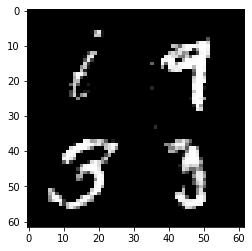

In [17]:
import numpy as np
import torch.nn.functional as F

x = torch.randn(4, 64).to(torch.device('mps'))
out = ngen(x)
out = out.view(-1, 1, 28, 28)
image_unflat = F.relu(out.detach().cpu().view(-1, 1, 28, 28))
image_grid = torchvision.utils.make_grid(image_unflat[:4], nrow=2)
plt.imshow(image_grid.permute(1, 2, 0).squeeze())
plt.show()
